<a href="https://colab.research.google.com/github/yossymaynaldi/Student-sDropOutPrediction/blob/main/Student's_Drop_Out_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student's Drop Out Prediction

Data Source = https://www.kaggle.com/datasets/mattop/predict-students-dropout-and-academic-success/code

## Environtment

In [174]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

import numpy as np

In [175]:
# Generate summary of the data include column name, data type, etc.
def check(df):
  summary= []
  for col in df.columns:
    instances = df[col].count()
    dtypes = df[col].dtype
    unique = df[col].nunique()
    sum_null = df[col].isnull().sum()
    duplicates = df[col].duplicated().sum()
    summary.append([col,
                    dtypes,
                    instances,
                    unique,
                    sum_null,
                    duplicates])
  df_check = pd.DataFrame(summary, columns =["column",
                                             "dtype",
                                             "instances",
                                             "unique",
                                             "sum_null",
                                             "duplicates"])
  return df_check


## Data Loading

In [176]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Kaggle/students dropout.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Statistics Descriptive

In [177]:
df.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.1786,0.6057,1.00,1.00,1.0000,1.0000,6.0000
Application mode,4424.0,18.6691,17.4847,1.00,1.00,17.0000,39.0000,57.0000
Application order,4424.0,1.7278,1.3138,0.00,1.00,1.0000,2.0000,9.0000
Course,4424.0,8856.6426,2063.5664,33.00,9085.00,9238.0000,9556.0000,9991.0000
Daytime/evening attendance,4424.0,0.8908,0.3119,0.00,1.00,1.0000,1.0000,1.0000
Previous qualification,4424.0,4.5778,10.2166,1.00,1.00,1.0000,1.0000,43.0000
Previous qualification (grade),4424.0,132.6133,13.1883,95.00,125.00,133.1000,140.0000,190.0000
Nacionality,4424.0,1.8732,6.9145,1.00,1.00,1.0000,1.0000,109.0000
Mother's qualification,4424.0,19.5619,15.6032,1.00,2.00,19.0000,37.0000,44.0000
Father's qualification,4424.0,22.2753,15.3431,1.00,3.00,19.0000,37.0000,44.0000


In [178]:
check(df).sort_values(by='sum_null', ascending=False).reset_index(drop=True)

,column,dtype,instances,unique,sum_null,duplicates
0,Marital status,int64,4424,6,0,4418
1,Age at enrollment,int64,4424,46,0,4378
2,Curricular units 1st sem (credited),int64,4424,21,0,4403
3,Curricular units 1st sem (enrolled),int64,4424,23,0,4401
4,Curricular units 1st sem (evaluations),int64,4424,35,0,4389
5,Curricular units 1st sem (approved),int64,4424,23,0,4401
6,Curricular units 1st sem (grade),float64,4424,797,0,3627
7,Curricular units 1st sem (without evaluations),int64,4424,11,0,4413
8,Curricular units 2nd sem (credited),int64,4424,19,0,4405
9,Curricular units 2nd sem (enrolled),int64,4424,22,0,4402


In [179]:
# Define unique value
unique_values={}
for col in df.columns:
  unique_values[col]=df[col].unique()
for key,lah in unique_values.items():
  print(f'{key}:{lah}\n')

Marital status:[1 2 4 3 5 6]

Application mode:[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]

Application order:[5 1 2 4 3 6 9 0]

Course:[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]

Daytime/evening attendance:[1 0]

Previous qualification:[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]

Previous qualification (grade):[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]

Nacionality

## Data Visualization

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
df['gender_cat']=df['Gender'].apply(lambda x : ('Woman' if x == 0 else 'Men'))

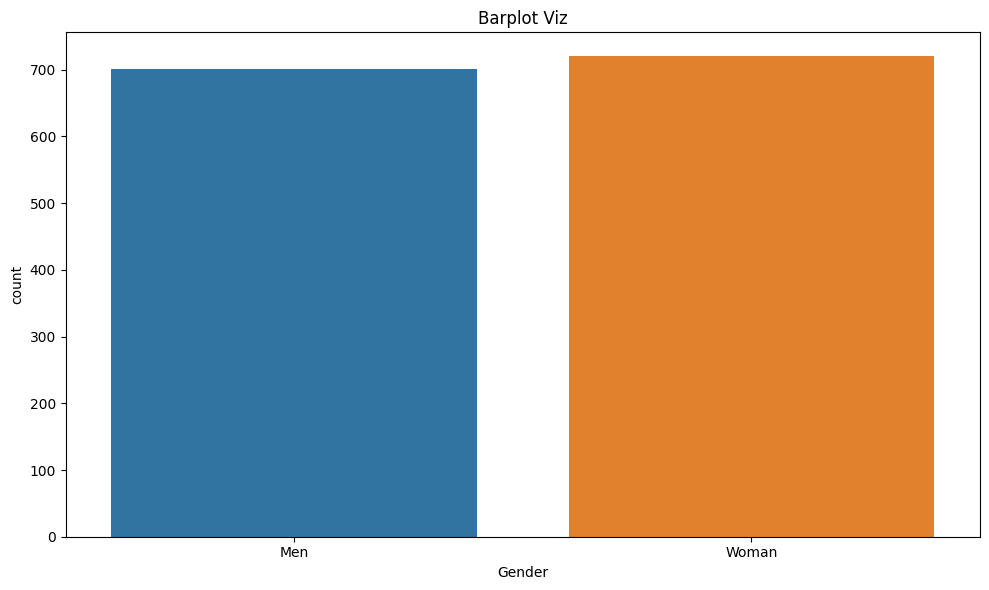

In [182]:
# Student's drop out visualization by gender

plt.figure(figsize=(10,6))
sns.countplot(x='gender_cat', data=df[df['Target'] == 'Dropout'], hue='gender_cat')
plt.title('Barplot Viz')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

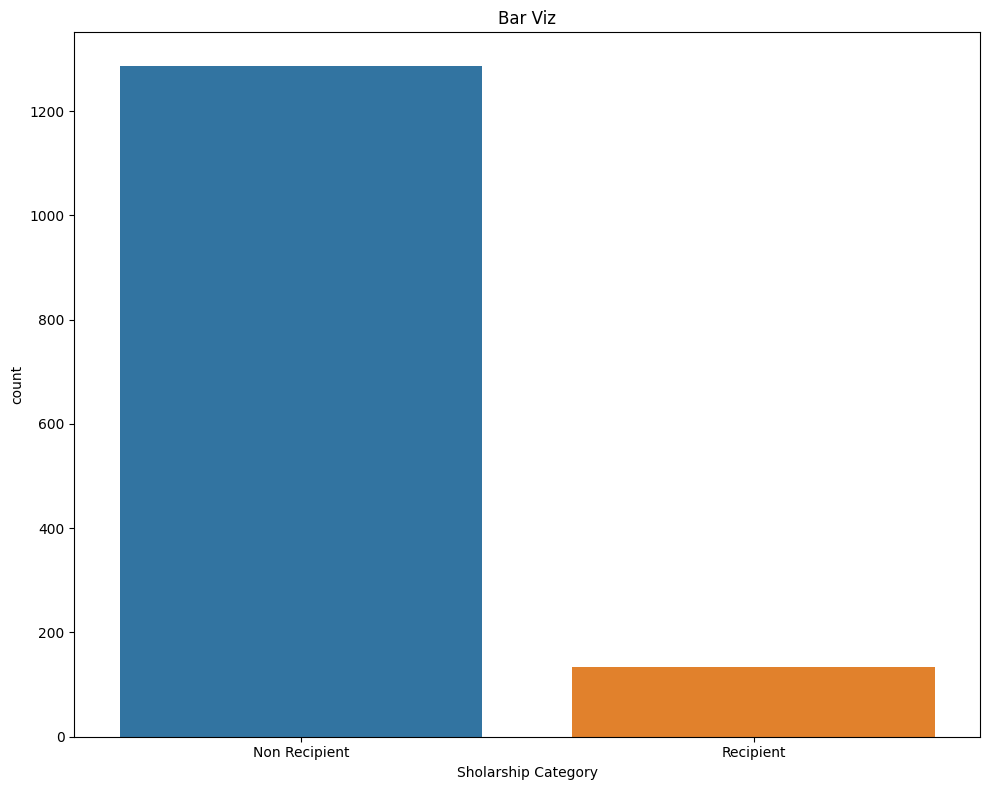

In [183]:
# Student's drop out visualization by scholarship recipient
df['scholarship_cat']= df['Scholarship holder'].apply(lambda x : 'Recipient' if x==1 else 'Non Recipient')
plt.figure(figsize=(10,8))
sns.countplot(x='scholarship_cat',
              data=df[df['Target']=='Dropout'],
              hue = 'scholarship_cat')
plt.title('Bar Viz')
plt.xlabel('Sholarship Category')
plt.tight_layout()
plt.show()

In [184]:
# Drop unused columns
columns = [
    'gender_cat',
    'scholarship_cat']
for i in columns:
  df.drop(i,axis=1,inplace=True)

## Preprocessing Data

In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
# Encoding the Target variable
df['Target']=LabelEncoder().fit_transform(df['Target'])
print(df['Target'].head(7))
check(df)

0    0
1    2
2    0
3    2
4    2
5    2
6    2
Name: Target, dtype: int64


,column,dtype,instances,unique,sum_null,duplicates
0,Marital status,int64,4424,6,0,4418
1,Application mode,int64,4424,18,0,4406
2,Application order,int64,4424,8,0,4416
3,Course,int64,4424,17,0,4407
4,Daytime/evening attendance,int64,4424,2,0,4422
5,Previous qualification,int64,4424,17,0,4407
6,Previous qualification (grade),float64,4424,101,0,4323
7,Nacionality,int64,4424,21,0,4403
8,Mother's qualification,int64,4424,29,0,4395
9,Father's qualification,int64,4424,34,0,4390


In [187]:
print(df.corr()['Target'].sort_values(ascending=False))

Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107
Curricular units 2nd sem (credited)               0.054004
Curricular units 1st sem (credited)               0.0481

<Axes: >

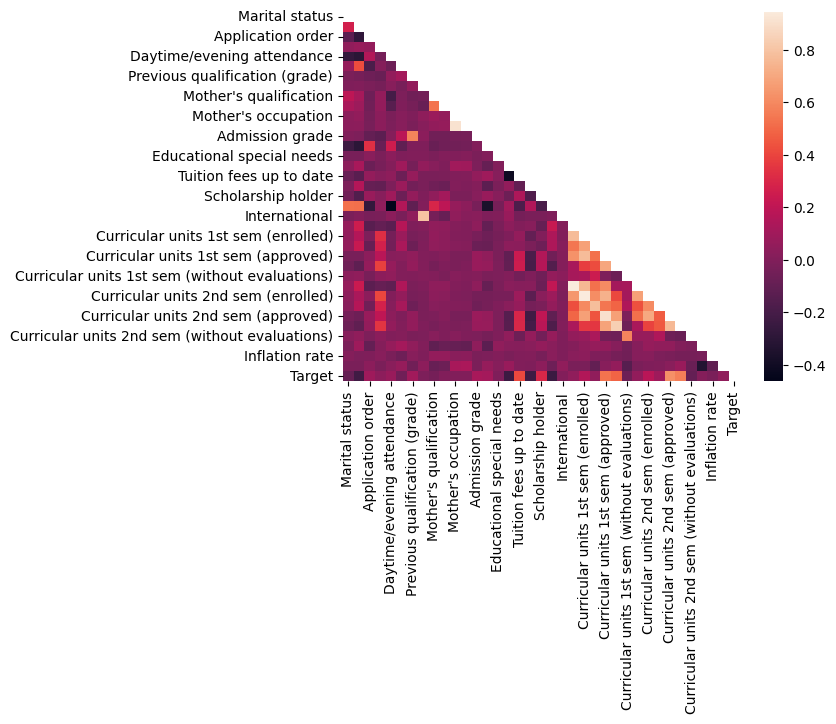

In [188]:
sns.heatmap(df.corr(),
            mask = np.triu(np.ones_like(df.corr())))

In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [190]:
# split the data into training and test
X = df.drop('Target',axis=1)
y = df['Target']
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state=42)


## Model

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)

from sklearn.model_selection import(
    cross_validate,
    KFold,
    StratifiedShuffleSplit,
    StratifiedKFold,
    GridSearchCV,
    cross_val_score
)

import warnings
warnings.filterwarnings('ignore')

In [192]:
seed = 42
models = {
    "Logistic Regression" : LogisticRegression(random_state=seed),
    "Support Vector Classifier" : SVC(random_state=seed),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Decision Tree" : DecisionTreeClassifier(random_state=seed),
    "Random Forest Classifier" : RandomForestClassifier(random_state=seed),
    "Extra Trees Classifier" : ExtraTreesClassifier(random_state=seed),
    "Adaboost Classifier" : AdaBoostClassifier(random_state=seed),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(random_state=seed),
    "Bagging Classifier" : BaggingClassifier(random_state=seed),
    "Histogram-based Gradient Boosting Classifier" : HistGradientBoostingClassifier(random_state=seed),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Multi-layer Perceptron" : MLPClassifier(random_state=seed),
    "Extreme Gradient Boosting Classifier" : XGBClassifier(random_state=seed)
}

In [193]:
classifier_names = []
accuracies = []
precisions = []
recalls = []
f1_scores_list = []

for classifier_name, classifier_instances in models.items():
  clf = classifier_instances

  cv_scores = cross_val_score(clf,
                              X_train,
                              y_train,
                              cv=3,
                              scoring='accuracy')

  precision_scores = cross_val_score(clf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring='precision_weighted')

  recall_scores = cross_val_score(clf,
                                  X_train,
                                  y_train,
                                  cv=3,
                                  scoring='recall_weighted')

  f1_scores = cross_val_score(clf,
                              X_train,
                              y_train,
                              cv=3,
                              scoring='f1_weighted')

  print(f'{classifier_name} : ')
  print(f'Accuracy : {cv_scores.mean():.2f} with a standard deviation of {cv_scores.std():.2f}')
  print(f'Precision : {precision_scores.mean():.2f} with a standard deviation of {precision_scores.std():.2f}')
  print(f'Recall : {recall_scores.mean():.2f} with a standard deviation of {recall_scores.std()}')
  print(f'F1 score : {f1_scores.mean():.2f} with a standard deviation of {f1_scores.std():.2f}')
  print(f'*'*50)

  classifier_names.append(classifier_name)
  accuracies.append(cv_scores.mean())
  precisions.append(precision_scores.mean())
  recalls.append(recall_scores.mean())
  f1_scores_list.append(f1_scores.mean())

metrics_df= pd.DataFrame({
    'Classifier' : classifier_names,
    'Accuracy' : accuracies,
    'Precision' : precisions,
    'Recall' : recalls,
    'F1 Score' : f1_scores_list
})

Logistic Regression : 
Accuracy : 0.77 with a standard deviation of 0.00
Precision : 0.75 with a standard deviation of 0.00
Recall : 0.77 with a standard deviation of 0.003567623067566951
F1 score : 0.75 with a standard deviation of 0.00
**************************************************
Support Vector Classifier : 
Accuracy : 0.76 with a standard deviation of 0.00
Precision : 0.75 with a standard deviation of 0.01
Recall : 0.76 with a standard deviation of 0.004635885043413226
F1 score : 0.75 with a standard deviation of 0.00
**************************************************
K-Nearest Neighbors : 
Accuracy : 0.69 with a standard deviation of 0.01
Precision : 0.67 with a standard deviation of 0.01
Recall : 0.69 with a standard deviation of 0.013824893125990138
F1 score : 0.67 with a standard deviation of 0.01
**************************************************
Decision Tree : 
Accuracy : 0.68 with a standard deviation of 0.01
Precision : 0.69 with a standard deviation of 0.00
Recall : 

## Best Method by Accuracy

In [194]:
metrics_df.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosting Classifier,0.777132,0.764018,0.777132,0.765401
1,Random Forest Classifier,0.776486,0.761825,0.776486,0.761781
2,Histogram-based Gradient Boosting Classifier,0.776163,0.763687,0.776163,0.766052
3,Extreme Gradient Boosting Classifier,0.775840,0.763914,0.775840,0.765535
4,Logistic Regression,0.769703,0.750557,0.769703,0.753143
5,Extra Trees Classifier,0.769380,0.755075,0.769380,0.754174
6,Support Vector Classifier,0.761951,0.749914,0.761951,0.745434
7,Bagging Classifier,0.753553,0.741826,0.753553,0.745103
8,Adaboost Classifier,0.753230,0.739232,0.753230,0.743609
9,Multi-layer Perceptron,0.741279,0.729272,0.741279,0.734062
